___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!



In [47]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)



In [14]:
start = datetime.datetime(2016,1,1)
end=datetime.datetime(2022,1,1)

In [15]:
#Bank of America
BAC = data.DataReader('BAC','stooq', start, end)
#CitiGroup
C = data.DataReader('C','stooq', start, end)
#Goldman Sachs
GS = data.DataReader('GS','stooq', start, end)
#JPMorgan Chase
JPM = data.DataReader('JPM','stooq', start, end)
#Morgan Stanley
MS = data.DataReader('MS','stooq', start, end)
#Wells Fargo
WFC = data.DataReader('WFC ','stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [18]:
tickers = ['BAC','C','GS','JPM','MS','WFC ']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [20]:
bank_stacks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [22]:
bank_stacks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2021-12-31  43.5066  43.7020  43.2729  43.4782  2.481868e+07  58.0952   
2021-12-30  43.7315  44.0693  43.4683  43.5164  2.440755e+07  58.2773   
2021-12-29  43.8297  44.0929  43.5851  43.6147  2.588387e+07  58.4604   
2021-12-28  43.4585  44.0545  43.4123  43.6834  3.325596e+07  58.1050   
2021-12-27  43.5361  43.8002  43.3013  43.6245  3.467728e+07  58.0658   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2021-12-31  58.4114  57.7966  58.0560  1.280199e+07  ...  95.3740  95.8371   
2021-12-30  58.7100  58.0560  58.0952  1.183803e+07  ...  95.4996  96.5719   
2021-12-29  58.6228  57.9405  58.2010  1.381803e+07  ...  96.6494  97.0890   
2021-12-28  58.9606  57.9748  58.2773  1.321088e+07  ...  97.1763  97.5657   
2021-12-27  58.5856  57.6811  58.3057  1.460949e+07  ...  96.3305  97.1086   

                                               WFC                     \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2021-12-31  94.1613  94.8236  5.305140e+06  46.9277  47.2504  46.7422   
2021-12-30  95.3642  95.4417  3.690382e+06  47.3777  47.7823  46.9376   
2021-12-29  95.3348  95.3740  7.166735e+06  47.4853  47.7350  47.2602   
2021-12-28  96.1951  96.5719  4.420555e+06  47.4458  48.0626  47.2504   
2021-12-27  95.7409  96.9918  4.343852e+06  47.4359  47.6954  46.9770   

                                   
              Close        Volume  
Date                               
2021-12-31  46.8794  1.294633e+07  
2021-12-30  46.9968  1.402305e+07  
2021-12-29  47.3382  1.472863e+07  
2021-12-28  47.3096  1.466287e+07  
2021-12-27  47.6510  1.217987e+07  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [24]:
bank_stacks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [25]:
bank_stacks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2021-12-31   43.5066  43.7020  43.2729  43.4782  2.481868e+07  58.0952   
2021-12-30   43.7315  44.0693  43.4683  43.5164  2.440755e+07  58.2773   
2021-12-29   43.8297  44.0929  43.5851  43.6147  2.588387e+07  58.4604   
2021-12-28   43.4585  44.0545  43.4123  43.6834  3.325596e+07  58.1050   
2021-12-27   43.5361  43.8002  43.3013  43.6245  3.467728e+07  58.0658   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2021-12-31   58.4114  57.7966  58.0560  1.280199e+07  ...  95.3740  95.8371   
2021-12-30   58.7100  58.0560  58.0952  1.183803e+07  ...  95.4996  96.5719   
2021-12-29   58.6228  57.9405  58.2010  1.381803e+07  ...  96.6494  97.0890   
2021-12-28   58.9606  57.9748  58.2773  1.321088e+07  ...  97.1763  97.5657   
2021-12-27   58.5856  57.6811  58.3057  1.460949e+07  ...  96.3305  97.1086   

Bank Ticker                                     WFC                     \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2021-12-31   94.1613  94.8236  5.305140e+06  46.9277  47.2504  46.7422   
2021-12-30   95.3642  95.4417  3.690382e+06  47.3777  47.7823  46.9376   
2021-12-29   95.3348  95.3740  7.166735e+06  47.4853  47.7350  47.2602   
2021-12-28   96.1951  96.5719  4.420555e+06  47.4458  48.0626  47.2504   
2021-12-27   95.7409  96.9918  4.343852e+06  47.4359  47.6954  46.9770   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2021-12-31   46.8794  1.294633e+07  
2021-12-30   46.9968  1.402305e+07  
2021-12-29   47.3382  1.472863e+07  
2021-12-28   47.3096  1.466287e+07  
2021-12-27   47.6510  1.217987e+07  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [26]:
bank_stacks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC      47.0429
C        75.6568
GS      410.7930
JPM     166.5240
MS      101.1700
WFC      57.0701
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [27]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [29]:
for tick in tickers:
    returns[tick+'Return'] = bank_stacks[tick]['Close'].pct_change()

In [30]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFC Return
Date,,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-30,0.000879,0.000675,0.007757,0.000827,0.006518,0.002504
2021-12-29,0.002259,0.001821,0.001773,0.000514,-0.000709,0.007264
2021-12-28,0.001575,0.001311,0.003646,0.000449,0.012560,-0.000604
2021-12-27,-0.001348,0.000487,0.001117,-0.003004,0.004348,0.007216


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

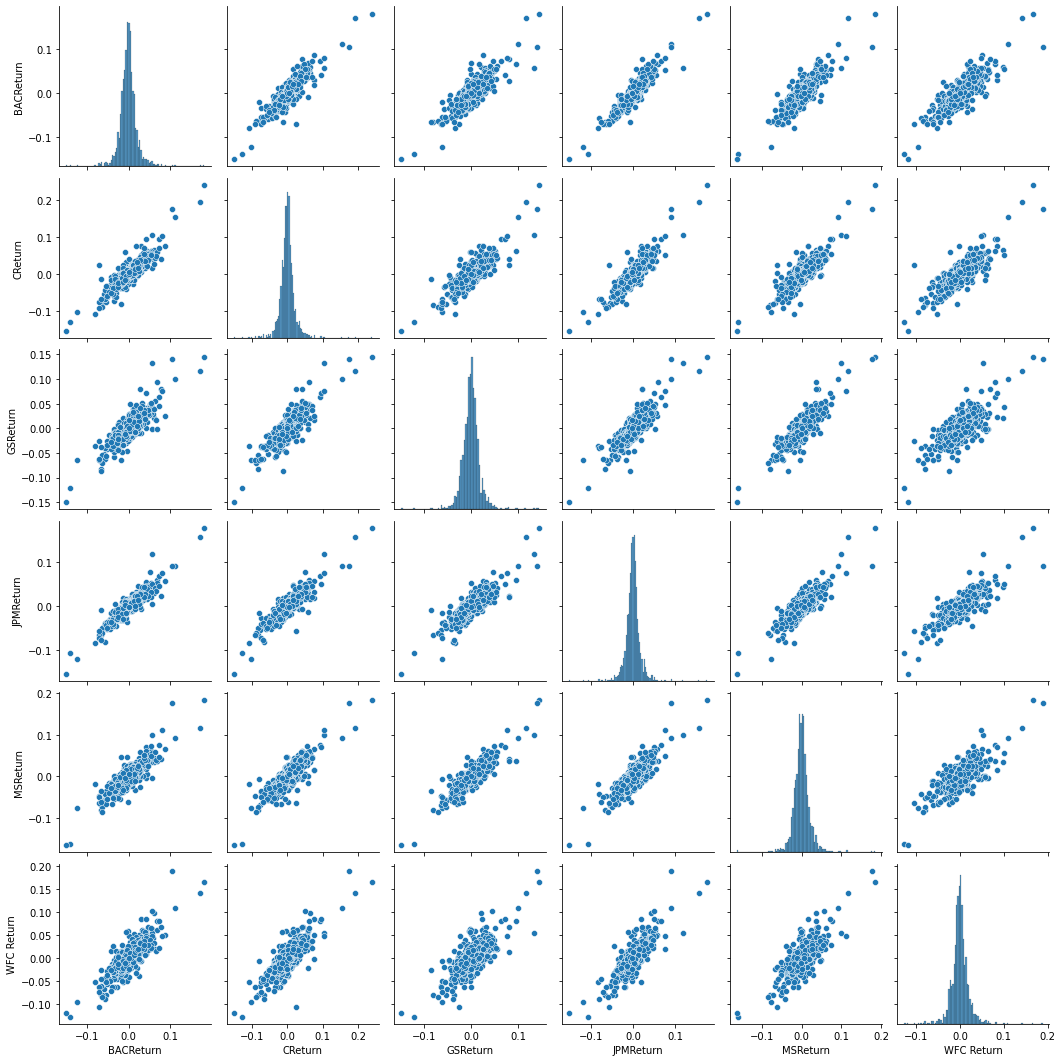

In [34]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [37]:
returns.idxmin()

BACReturn    2020-03-12
CReturn      2020-03-12
GSReturn     2020-03-12
JPMReturn    2020-03-12
MSReturn     2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

In [38]:
returns.idxmax()

BACReturn    2020-03-13
CReturn      2020-03-13
GSReturn     2020-03-13
JPMReturn    2020-03-13
MSReturn     2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [39]:
returns.std()

BACReturn     0.021137
CReturn       0.022919
GSReturn      0.019472
JPMReturn     0.018398
MSReturn      0.021149
WFC Return    0.021245
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<Figure size 864x864 with 0 Axes>

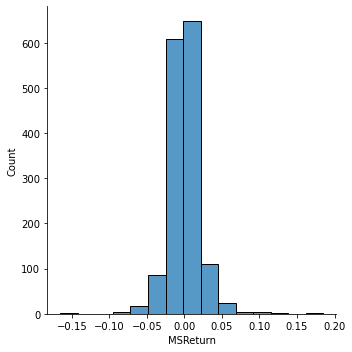

In [51]:
plt.figure(figsize=(12,12))
sns.displot(returns['MSReturn'],bins=15)

<Figure size 864x864 with 0 Axes>

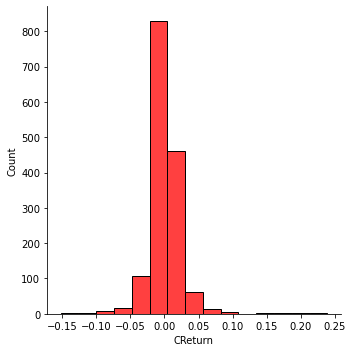

In [53]:
plt.figure(figsize=(12,12))
sns.displot(returns['CReturn'],bins=15,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [55]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time

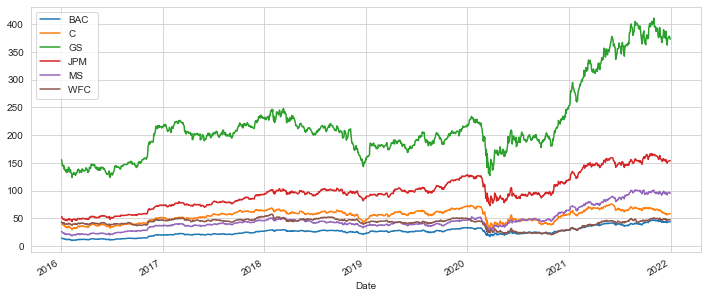

In [56]:
for tick in tickers:
    bank_stacks[tick]['Close'].plot(label=tick,figsize=(12,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

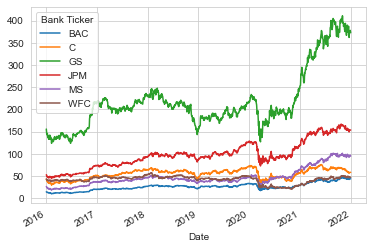

In [63]:
bank_stacks.xs(key='Close',axis=1,level='Stock Info').plot()

In [64]:
bank_stacks.xs(key='Close',axis=1,level='Stock Info').iplot()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

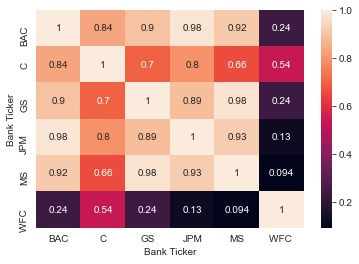

In [75]:
#sns.heatmap()
sns.heatmap(bank_stacks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

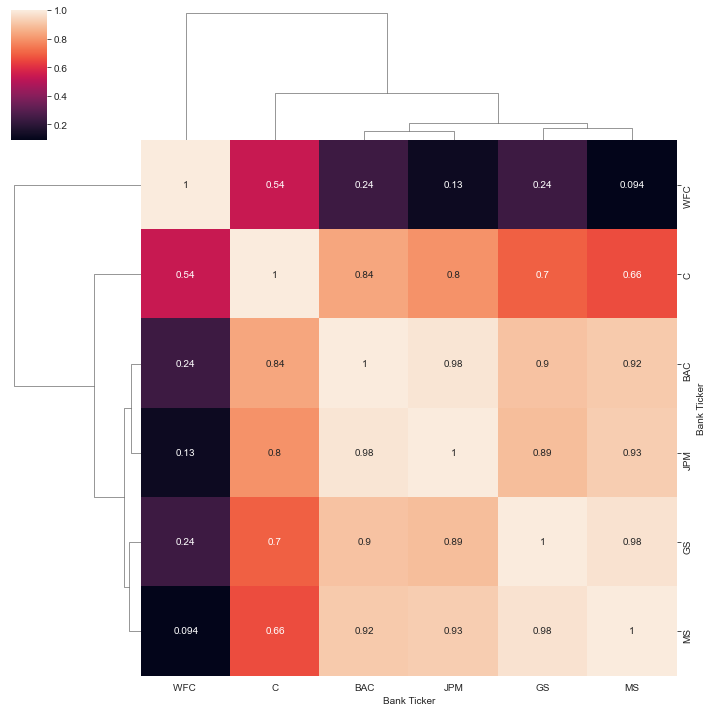

In [77]:
sns.clustermap(bank_stacks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [79]:
close_corr = bank_stacks.xs(key='Close',axis=1,level='Stock Info').corr()

In [81]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')